In [16]:
!pip install java

ERROR: Could not find a version that satisfies the requirement java (from versions: none)
ERROR: No matching distribution found for java


In [17]:
# java version 8로 변경
!java -version
!java update-alternativeAs --config java
!java -version

java version "1.8.0_251"
Java(TM) SE Runtime Environment (build 1.8.0_251-b08)
Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
����: �⺻ Ŭ���� update-alternativeAs��(��) ã�ų� �ε��� �� �����ϴ�.
java version "1.8.0_251"
Java(TM) SE Runtime Environment (build 1.8.0_251-b08)
Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)


In [13]:
import io
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#노트북에서 셀아래바로표시
%matplotlib inline 
import matplotlib.image as mpimg
# !pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS, ALSModel
from tensorflow.keras.applications import MobileNetV2
from scipy.spatial.distance import cosine
np.random.seed(0)
# !pip3 install pickle5
# import pickle5
import joblib
# !pip install dill
import dill

In [14]:
!pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Running setup.py clean for pickle5
Failed to build pickle5
    Running setup.py install for pickle5: started
    Running setup.py install for pickle5: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-ro3b1t1s\\pickle5_20640edfdec5474c98f10e74b5d6e39c\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-ro3b1t1s\\pickle5_20640edfdec5474c98f10e74b5d6e39c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-e2bvbupr'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-ro3b1t1s\pickle5_20640edfdec5474c98f10e74b5d6e39c\
  Complete output (17 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating

In [11]:
#######모델 불러오기 (dnn feature뽑아오기,als 해시태그 추천)
model_path='C:/django/Hashtag_Team16/modeling/mobilenetv2.pkl'
neural_network = open(model_path, "rb")
spark = SparkSession.builder.master('local').appName('all').getOrCreate()
als_path='C:/django/Hashtag_Team16/modeling/als'
als_model = ALSModel.load(als_path)

#######데이터 불러오기 (pics 이미지의 피처 데이터프레임,hashtags_df 모든해시태그, recommender_df 추천df)
recommender_df=joblib.load('./recommender_df_0424_1.pkl')
hashtags_df=joblib.load('./hashtags_df_0424_1.pkl')

Py4JJavaError: An error occurred while calling o48.load.
: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:793)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1215)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1420)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:601)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.fs.FileSystem$4.<init>(FileSystem.java:2180)
	at org.apache.hadoop.fs.FileSystem.listLocatedStatus(FileSystem.java:2179)
	at org.apache.hadoop.fs.ChecksumFileSystem.listLocatedStatus(ChecksumFileSystem.java:783)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:285)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:205)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:300)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:296)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:300)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:296)
	at org.apache.spark.rdd.RDD.$anonfun$take$1(RDD.scala:1428)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1422)
	at org.apache.spark.rdd.RDD.$anonfun$first$1(RDD.scala:1463)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.first(RDD.scala:1463)
	at org.apache.spark.ml.util.DefaultParamsReader$.loadMetadata(ReadWrite.scala:587)
	at org.apache.spark.ml.recommendation.ALSModel$ALSModelReader.load(ALS.scala:553)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)


In [30]:
def prepare_image(img_path, height=160, width=160):
  # 신경망에 맞게 이미지를 다운 샘플링 및 스케일링
  img = tf.io.read_file(img_path) # 불러(읽어)오기
  img = tf.image.decode_jpeg(img) # [height, width, num_channels]인 3차원 배열을 반환
  img = tf.cast(img, tf.float32) # 정수형으로 바꾼경우 소수점을 버린다 boolean일때는 True면 1, False면 0을 출력
  img = (img/127.5) - 1
  img = tf.image.resize(img, (height, width))
  # 컬러 이미지의 차원에 맞게 회색조 이미지 형태변경
  if img.shape != (160, 160, 3):
    img = tf.concat([img, img, img], axis=2)
  return img

def extract_features(image, neural_network):
  # input받은 이미지를 1280개의 deep feature들로 구성된 벡터로 반환
  image_np = image.numpy() # numpy형태로 변환
  images_np = np.expand_dims(image_np, axis=0) # 차원추가([]를 씌워준다)
  deep_features = neural_network.predict(images_np)[0]
  return deep_features

# 코사인 유사성에 기반한 K개의 최근접이웃을 찾는 함수 
# ***코사인유사도가 아닌 디텍션을 사용???
# 픽셀로 유사도 측정이면 유사도 일치가능성이 높음 (사람사진,개사진),논리적 비약이 존재
# 그렇다면 어떻게 판단할 것인가? 디텍션과 같이해서 하이브리드 모델을 만들것인가?
# 코사인유사도 뽑고 디텍션,세그멘테이션 이미지도 뽑아서 둘 중 높은 것을 순서대로 출력?(weight를 어떻게 주느냐에 따라 달라질것이니)
# 댓글 필터링 어떤식으로 할것인가?
def find_neighbor_vectors(image_path, k=5, recommender_df=recommender_df):
    # 비슷한 이미지에 대한 img_features(이미지 피쳐, 즉 사용자 벡터)를 찾는다.
    prep_image = prepare_image(image_path)
    pics = extract_features(prep_image, neural_network)
    rdf = recommender_df.copy()
    rdf['dist'] = rdf['deep_features'].apply(lambda x: cosine(x, pics))
    rdf = rdf.sort_values(by='dist')
    return rdf.head(k)
  

def generate_hashtags(image_path):
    fnv = find_neighbor_vectors(image_path, k=5, recommender_df=recommender_df)
    # 코사인 유사성에 기반하여 5개의 사용자 벡터의 평균을 구한다.
    features = []
    for item in fnv.features.values:
        features.append(item)

    avg_features = np.mean(np.asarray(features), axis=0)
    
    hashtag_features = als_model.itemFactors.toPandas()

    # 앞서 구한 이미지(사용자) 피쳐의 평균, 즉 avg_features을 hashtag_features와 dot product하여 새로운 dot_product열 생성
    hashtag_features['dot_product'] = hashtag_features['features'].apply(lambda x: np.asarray(x).dot(avg_features))
    
    # 가장 높은 dot product를 가진 해시태그 상위 10개 추출
    final_recs = hashtag_features.sort_values(by='dot_product', ascending=False).head(50)

    # hastag_id로 hashtag 찾아서 output에 저장
    output = []
    for hashtag_id in final_recs.id.values:
        output.append(hashtags_df.iloc[hashtag_id]['hashtag'])
    return output

# test할 이미지데이터에 대한 해시태그 분석
def show_results(test_image):
    img = mpimg.imread(f'C:/django/Hashtag_Team16/modeling/testimg/{test_image}.jpg')
    plt.figure(figsize=(9, 9)) 
    plt.imshow(img)
    
    recommended_hashtags = generate_hashtags(f'C:/django/Hashtag_Team16/modeling/testimg/{test_image}.jpg')
    # print(', '.join(recommended_hashtags))
    return recommended_hashtags

AttributeError: '_io.BufferedReader' object has no attribute 'predict'

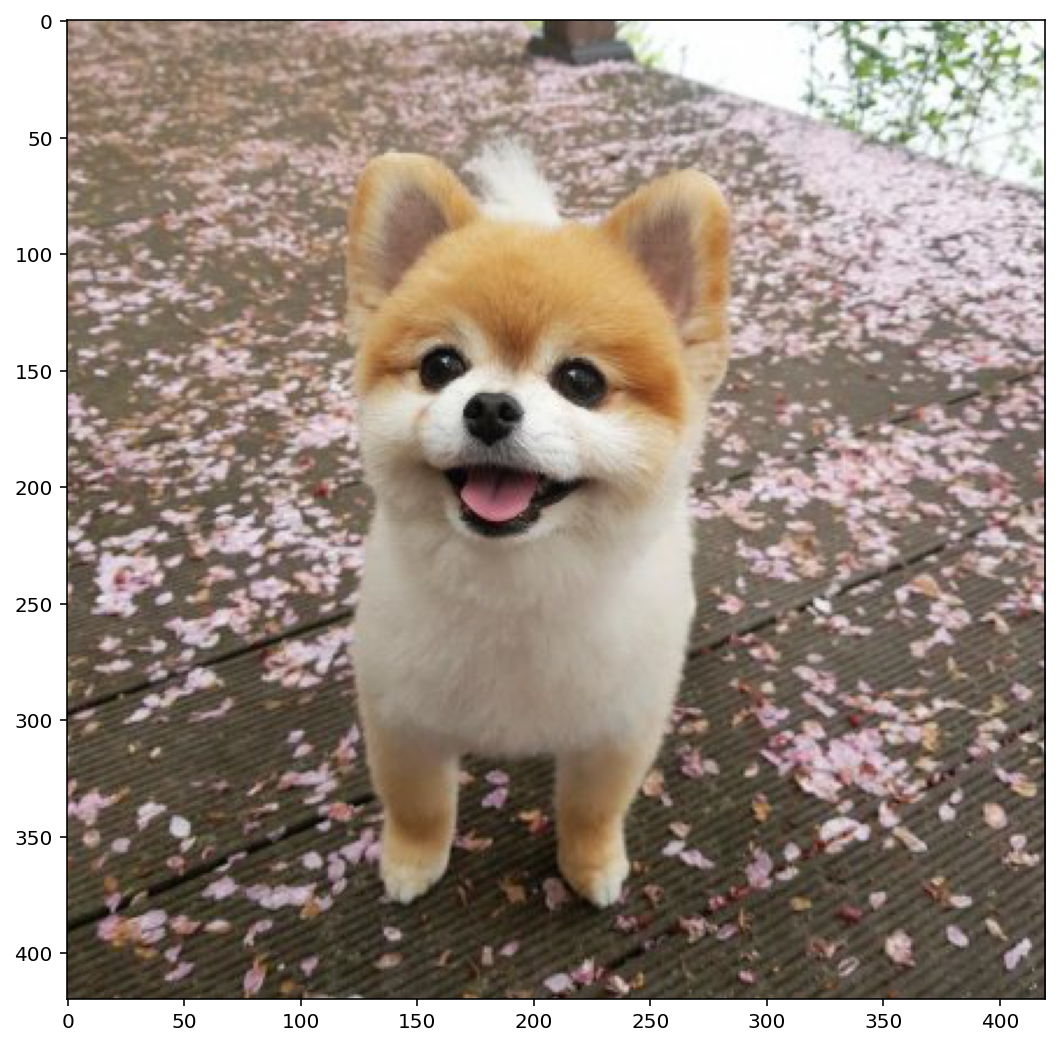

In [31]:
show_results('img')